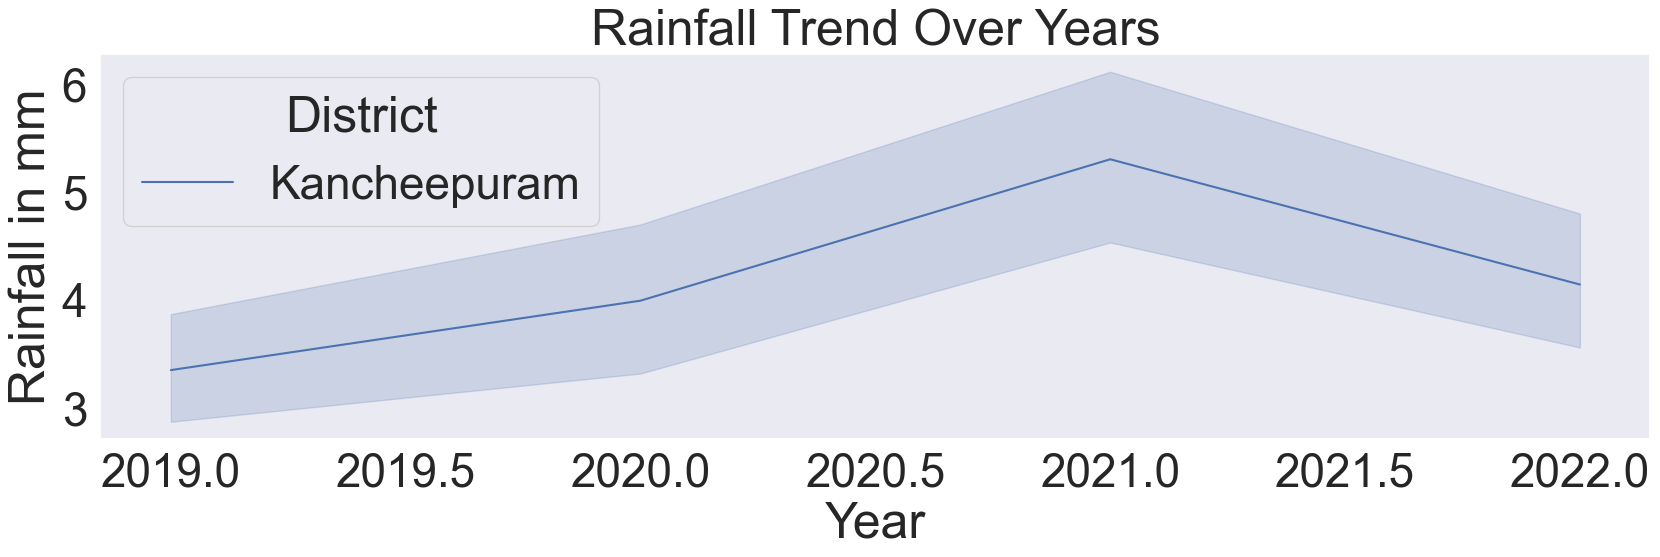

Mann_Kendall_Test(trend='increasing', h=True, p=0.03989471123264621, z=2.054837413082116, Tau=0.011156592020499395, s=297634.0, var_s=20980084584.666668, slope=0.0, intercept=0.0)


In [70]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd 
import pymannkendall as mk


df = pd.read_csv("kanchi_rainfall.csv")
df.head()

plt.figure(figsize=(20, 5))
sns.set_theme(style='dark', font_scale=3)
sns.lineplot(x='Year', y='RF in mm', hue='District', data=df)

plt.title('Rainfall Trend Over Years')
plt.xlabel('Year')
plt.ylabel('Rainfall in mm')
plt.show()

# Performing Mann-Kendall test
df_sorted = df.sort_values(by='Year')
result = mk.original_test(df_sorted['RF in mm'])
print(result)


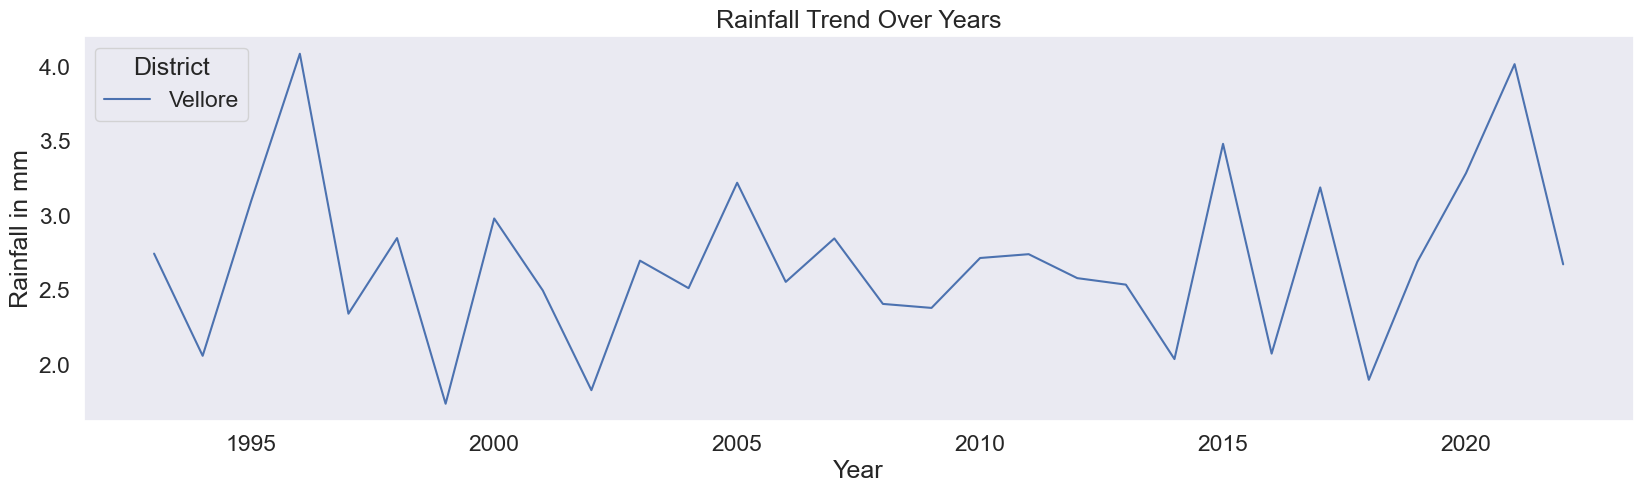

Results for District Vellore:
Mann_Kendall_Test(trend='no trend', h=False, p=0.6685166224807093, z=0.4281847440840379, Tau=0.05747126436781609, s=25.0, var_s=3141.6666666666665, slope=0.007270524648215458, intercept=2.576070543285807)



In [74]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import pymannkendall as mk

df = pd.read_excel("vellore.xlsx")
df['Year'] = pd.to_datetime(df['Year'], format='%Y')
df['Year'] = df['Year'].dt.year
yearly_avg = df.groupby(['District', 'Year'])['RF in mm'].mean().reset_index()


plt.figure(figsize=(20, 5))
sns.set_theme(style='dark', font_scale=1.5)
sns.lineplot(x='Year', y='RF in mm', hue='District', data=yearly_avg)
plt.title('Rainfall Trend Over Years')
plt.xlabel('Year')
plt.ylabel('Rainfall in mm')
plt.show()

# Performing Mann-Kendall test over vellore
results = {}
for district in yearly_avg['District'].unique():
    district_data = yearly_avg[yearly_avg['District'] == district]
    result = mk.original_test(district_data['RF in mm'])
    results[district] = result
for district, result in results.items():
    print(f"Results for District {district}:\n{result}\n")


In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import pymannkendall as mk
df = pd.read_csv("ranipet_rainfall.csv")
df['Year'] = pd.to_datetime(df['Year'], format='%Y')

# Downsample the data to yearly averages for each district
df['Year'] = df['Year'].dt.year
yearly_avg = df.groupby(['District', 'Year'])['RF in mm'].mean().reset_index()

plt.figure(figsize=(20, 5))
sns.set_theme(style='dark', font_scale=1.5)
sns.lineplot(x='Year', y='RF in mm', hue='District', data=yearly_avg)
plt.title('Rainfall Trend Over Years')
plt.xlabel('Year')
plt.ylabel('Rainfall in mm')
plt.show()

#Performing Mann kendall test over ranipet
results = {}
for district in yearly_avg['District'].unique():
    district_data = yearly_avg[yearly_avg['District'] == district]
    result = mk.original_test(district_data['RF in mm'])
    results[district] = result
for district, result in results.items():
    print(f"Results for District {district}:\n{result}\n")

FileNotFoundError: [Errno 2] No such file or directory: 'ranipet.csv'